In [34]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    


all2 = all[['DateTime', '종가_ex','1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
        '5Y_Mid_irs', '10Y_Mid_irs',  '1Y_Mid_crs', '2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf','M1_스왑포인트']]     
# all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
# all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)
all2 = all2.dropna()
        

In [35]:
all2.columns

Index(['DateTime', '종가_ex', '1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
       '5Y_Mid_irs', '10Y_Mid_irs', '1Y_Mid_crs', '2Y_Mid_crs', '3Y_Mid_crs',
       '5Y_Mid_crs', '10Y_Mid_crs', '국고1년', '국고3년', '국고5년', '국고10년', '통안364일',
       '통안2년', 'Mid_ndf', 'M1_스왑포인트', '전일종가_ex'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler

x = all2[['1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
       '5Y_Mid_irs', '10Y_Mid_irs', '1Y_Mid_crs', '2Y_Mid_crs', '3Y_Mid_crs',
       '5Y_Mid_crs', '10Y_Mid_crs', '국고1년', '국고3년', '국고5년', '국고10년', '통안364일',
       '통안2년', 'Mid_ndf', 'M1_스왑포인트', '전일종가_ex']] # , "전일종가_ex"
y = all2[["종가_ex"]]

x.feature = x.columns 


# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정
x_scaled


,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,Mid_ndf,M1_스왑포인트,전일종가_ex
열1,,,,,,,,,,,,,,,,,,,
1,1.652310,1.263379,1.207866,1.100042,1.053572,1.488861,1.163810,1.083955,0.730814,0.550317,1.690917,1.357231,1.137652,1.137470,1.640291,1.431569,-0.024164,1.909409,-0.149841
2,1.604777,1.217615,1.162109,1.055195,1.025136,1.472695,1.139146,1.051664,0.608203,0.329562,1.659345,1.326172,1.039146,1.030243,1.608970,1.415997,0.048749,1.818881,-0.056232
3,1.636465,1.248124,1.192614,1.085093,1.039354,1.472695,1.098039,1.003226,0.546898,0.270694,1.675131,1.341702,1.039146,1.030243,1.624631,1.431569,-0.124421,1.818881,-0.000426
4,1.652310,1.248124,1.192614,1.100042,1.067790,1.505027,1.122703,1.003226,0.439614,0.152958,1.659345,1.341702,1.039146,1.030243,1.608970,1.415997,-0.115306,1.909409,-0.104837
5,1.668154,1.278634,1.223119,1.129940,1.110444,1.521194,1.122703,1.003226,0.408961,0.094090,1.643560,1.310642,1.011001,0.999607,1.593310,1.400424,-0.092521,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2.198933,2.094762,1.993358,1.705474,1.202860,2.248681,2.618991,2.472494,1.880287,1.271450,1.896129,1.916307,1.306521,1.305970,1.969160,1.914313,3.181295,-0.896960,3.207485
2456,2.183089,2.064253,1.947601,1.660627,1.160206,2.264847,2.569663,2.424057,1.849634,1.242016,1.911914,1.869717,1.278376,1.260016,1.984820,1.914313,3.202258,-0.987488,3.220086
2457,2.167245,1.987979,1.856088,1.570934,1.074899,2.281013,2.553220,2.407911,1.834308,1.227299,1.911914,1.823128,1.208014,1.168107,2.016141,1.898740,3.193144,-0.851696,3.110275


In [37]:
x_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2459 entries, 1 to 2459
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1Y_Mid_irs   2459 non-null   float64
 1   2Y_Mid_irs   2459 non-null   float64
 2   3Y_Mid_irs   2459 non-null   float64
 3   5Y_Mid_irs   2459 non-null   float64
 4   10Y_Mid_irs  2459 non-null   float64
 5   1Y_Mid_crs   2459 non-null   float64
 6   2Y_Mid_crs   2459 non-null   float64
 7   3Y_Mid_crs   2459 non-null   float64
 8   5Y_Mid_crs   2459 non-null   float64
 9   10Y_Mid_crs  2459 non-null   float64
 10  국고1년         2459 non-null   float64
 11  국고3년         2459 non-null   float64
 12  국고5년         2459 non-null   float64
 13  국고10년        2459 non-null   float64
 14  통안364일       2459 non-null   float64
 15  통안2년         2459 non-null   float64
 16  Mid_ndf      2459 non-null   float64
 17  M1_스왑포인트     2459 non-null   float64
 18  전일종가_ex      2459 non-null   float64
dtypes: flo

<AxesSubplot:>

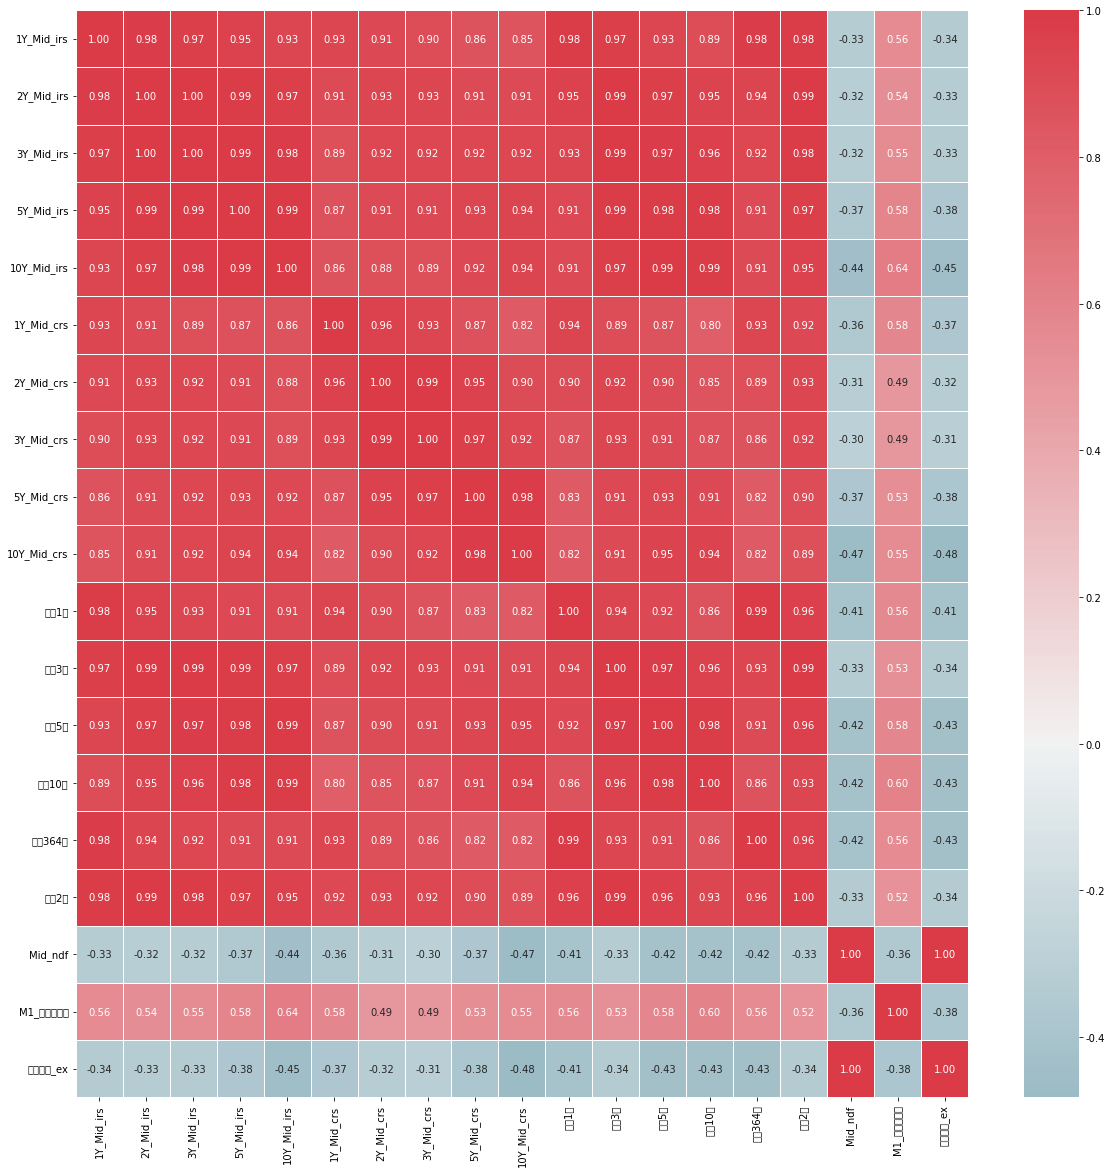

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [39]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.322e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:17:30   Log-Likelihood:                -6974.2
No. Observations:                2459   AIC:                         1.399e+04
Df Residuals:                    2439   BIC:                         1.410e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8939      0.084   1.36e+04      0.000    1134.730    1135.058
1Y_Mid_irs      1.5834      1.820      0.870      0.384      -1.986       5.153
2Y_Mid_irs     -2.1217      3.565     -0.595      0.552      -9.113       4.870
3Y_Mid_irs      1.5948      2.260      0.706      0.480      -2.837       6.026
5Y_Mid_irs      3.2664      3.224      1.013      0.311      -3.055       9.588
10Y_Mid_irs    -2.5237      1.907     -1.323      0.186      -6.263       1.216
1Y_Mid_crs     -2.0657      0.624     -3.312      0.001      -3.289      -0.843
2Y_Mid_crs      1.5209      1.914      0.795      0.427      -2.233       5.275
3Y_Mid_crs     -1.6740      1.705     -0.982      0.326      -5.018       1.670
5Y_Mid_crs      2.7665      1.281      2.160      0.031       0.255       5.278
10Y_Mid_crs    -2.1366      0.860     -2.486      0.013      -3.822      -0.451
국고1년            0.7377      1.260      0.585      0.558      -1.733       3.209
국고3년           -0.7371      1.163     -0.634      0.526      -3.017       1.543
국고5년            0.4435      1.228      0.361      0.718      -1.964       2.851
국고10년          -0.7796      1.293     -0.603      0.547      -3.316       1.756
통안364일         -0.1667      0.780     -0.214      0.831      -1.696       1.363
통안2년           -0.1048      0.911     -0.115      0.908      -1.890       1.681
Mid_ndf        52.7308      1.146     45.999      0.000      50.483      54.979
M1_스왑포인트       -0.9468      0.178     -5.331      0.000      -1.295      -0.599
전일종가_ex         1.9345      1.150      1.681      0.093      -0.321       4.190
==============================================================================
Omnibus:                      312.629   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1847.824
Skew:                           0.443   Prob(JB):                         0.00
Kurtosis:                       7.153   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

     VIF_Factor      Feature
0    474.667088   1Y_Mid_irs
1   1821.293736   2Y_Mid_irs
2    731.738563   3Y_Mid_irs
3   1489.155002   5Y_Mid_irs
4    521.073319  10Y_Mid_irs
5     55.742819   1Y_Mid_crs
6    525.008152   2Y_Mid_crs
7    416.755290   3Y_Mid_crs
8    235.005488   5Y_Mid_crs
9    105.855279  10Y_Mid_crs
10   227.508931         국고1년
11   193.716484         국고3년
12   215.963469         국고5년
13   239.645910        국고10년
14    87.162680       통안364일
15   118.785484         통안2년
16   188.280811      Mid_ndf
17     4.518632     M1_스왑포인트
18   189.635713      전일종가_ex


In [41]:
x_scaled.drop(['1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs', '5Y_Mid_irs', '10Y_Mid_irs',], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0    52.762225   1Y_Mid_crs
1   512.522040   2Y_Mid_crs
2   412.922552   3Y_Mid_crs
3   227.496097   5Y_Mid_crs
4   102.651088  10Y_Mid_crs
5   134.727195         국고1년
6   118.231027         국고3년
7   136.385473         국고5년
8   111.991754        국고10년
9    85.692894       통안364일
10  103.205076         통안2년
11  187.512182      Mid_ndf
12    3.621711     M1_스왑포인트
13  189.010256      전일종가_ex


In [42]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.150e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:17:31   Log-Likelihood:                -6977.4
No. Observations:                2459   AIC:                         1.398e+04
Df Residuals:                    2444   BIC:                         1.407e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8939      0.084   1.36e+04      0.000    1134.730    1135.058
1Y_Mid_crs     -1.7639      0.607     -2.906      0.004      -2.954      -0.574
2Y_Mid_crs      0.9531      1.892      0.504      0.614      -2.757       4.663
3Y_Mid_crs     -1.4470      1.698     -0.852      0.394      -4.777       1.883
5Y_Mid_crs      3.0298      1.260      2.404      0.016       0.558       5.501
10Y_Mid_crs    -1.9997      0.847     -2.362      0.018      -3.660      -0.339
국고1년            1.2280      0.970      1.266      0.206      -0.674       3.130
국고3년            0.6688      0.909      0.736      0.462      -1.113       2.451
국고5년           -1.1869      0.976     -1.216      0.224      -3.101       0.727
국고10년          -0.0364      0.884     -0.041      0.967      -1.771       1.698
통안364일         -0.1393      0.774     -0.180      0.857      -1.656       1.378
통안2년            0.4571      0.849      0.538      0.590      -1.208       2.122
Mid_ndf        52.8923      1.144     46.224      0.000      50.648      55.136
M1_스왑포인트       -1.0422      0.159     -6.554      0.000      -1.354      -0.730
전일종가_ex         1.9259      1.149      1.676      0.094      -0.327       4.179
==============================================================================
Omnibus:                      313.374   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1874.576
Skew:                           0.440   Prob(JB):                         0.00
Kurtosis:                       7.186   Cond. No.                         99.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
x_scaled.columns

Index(['1Y_Mid_crs', '2Y_Mid_crs', '3Y_Mid_crs', '5Y_Mid_crs', '10Y_Mid_crs',
       '국고1년', '국고3년', '국고5년', '국고10년', '통안364일', '통안2년', 'Mid_ndf',
       'M1_스왑포인트', '전일종가_ex'],
      dtype='object')

In [44]:
x_scaled.drop(['2Y_Mid_crs', '3Y_Mid_crs','국고1년', '국고3년', '국고5년', '국고10년', '통안364일', '통안2년','전일종가_ex'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor      Feature
0    5.218097   1Y_Mid_crs
1   48.563666   5Y_Mid_crs
2   41.524643  10Y_Mid_crs
3    1.858980      Mid_ndf
4    1.628288     M1_스왑포인트


In [45]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 8.778e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:17:32   Log-Likelihood:                -6987.7
No. Observations:                2459   AIC:                         1.399e+04
Df Residuals:                    2453   BIC:                         1.402e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8939      0.084   1.35e+04      0.000    1134.730    1135.058
1Y_Mid_crs     -0.2830      0.191     -1.479      0.139      -0.658       0.092
5Y_Mid_crs      0.8205      0.584      1.406      0.160      -0.324       1.965
10Y_Mid_crs    -0.6474      0.540     -1.199      0.230      -1.706       0.411
Mid_ndf        54.9437      0.114    481.095      0.000      54.720      55.168
M1_스왑포인트       -1.2048      0.107    -11.272      0.000      -1.414      -0.995
==============================================================================
Omnibus:                      354.355   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2186.705
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       7.501   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
x_scaled.drop(['10Y_Mid_crs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor     Feature
0    4.395924  1Y_Mid_crs
1    4.139500  5Y_Mid_crs
2    1.214480     Mid_ndf
3    1.570314    M1_스왑포인트


In [48]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.097e+05
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:11   Log-Likelihood:                -6988.5
No. Observations:                2459   AIC:                         1.399e+04
Df Residuals:                    2454   BIC:                         1.402e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.084   1.35e+04      0.000    1134.730    1135.058
1Y_Mid_crs    -0.1919      0.176     -1.093      0.275      -0.536       0.152
5Y_Mid_crs     0.1508      0.170      0.885      0.376      -0.183       0.485
Mid_ndf       55.0244      0.092    596.034      0.000      54.843      55.205
M1_스왑포인트      -1.2290      0.105    -11.707      0.000      -1.435      -1.023
==============================================================================
Omnibus:                      361.740   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2242.137
Skew:                           0.535   Prob(JB):                         0.00
Kurtosis:                       7.554   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['5Y_Mid_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.100e+05
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:16:43   Log-Likelihood:                -6985.3
No. Observations:                2459   AIC:                         1.398e+04
Df Residuals:                    2454   BIC:                         1.401e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.084   1.36e+04      0.000    1134.730    1135.058
1Y_Mid_crs    -0.0646      0.105     -0.617      0.537      -0.270       0.141
Mid_ndf       55.0316      0.092    599.358      0.000      54.852      55.212
M1_스왑포인트      -1.2234      0.105    -11.687      0.000      -1.429      -1.018
대비_ndf        -0.2226      0.084     -2.654      0.008      -0.387      -0.058
==============================================================================
Omnibus:                      361.991   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2213.602
Skew:                           0.540   Prob(JB):                         0.00
Kurtosis:                       7.521   Cond. No.                         2.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
x_scaled.drop(['1Y_Mid_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.463e+05
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:23   Log-Likelihood:                -6989.1
No. Observations:                2459   AIC:                         1.399e+04
Df Residuals:                    2455   BIC:                         1.401e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.084   1.35e+04      0.000    1134.730    1135.058
5Y_Mid_crs     0.0015      0.102      0.014      0.988      -0.198       0.201
Mid_ndf       55.0274      0.092    596.305      0.000      54.846      55.208
M1_스왑포인트      -1.2592      0.101    -12.434      0.000      -1.458      -1.061
==============================================================================
Omnibus:                      364.062   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.458
Skew:                           0.540   Prob(JB):                         0.00
Kurtosis:                       7.570   Cond. No.                         1.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
x_scaled.drop(['5Y_Mid_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.195e+05
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:39   Log-Likelihood:                -6989.1
No. Observations:                2459   AIC:                         1.398e+04
Df Residuals:                    2456   BIC:                         1.400e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.084   1.35e+04      0.000    1134.730    1135.058
Mid_ndf       55.0271      0.090    612.744      0.000      54.851      55.203
M1_스왑포인트      -1.2585      0.090    -14.014      0.000      -1.435      -1.082
==============================================================================
Omnibus:                      363.985   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2258.605
Skew:                           0.540   Prob(JB):                         0.00
Kurtosis:                       7.569   Cond. No.                         1.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=10)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 17.137050809502817, RMSE :  4.140, MAE: 4.140
Variance score :  0.994


In [52]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(4.118533977257573,
 array([3.25419548, 4.90256451, 4.27260513, 4.36703433, 3.79627044]),
 array([-10.5897882 , -24.03513877, -18.25515463, -19.07098885,
        -14.41166923]))